Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("./data/train_bigmart.csv")
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train.columns.unique()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot:>

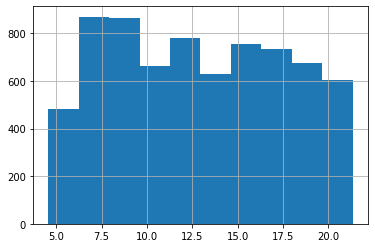

In [9]:
#item weight

train.Item_Weight.hist()

d:\programming_advance\data_bot\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

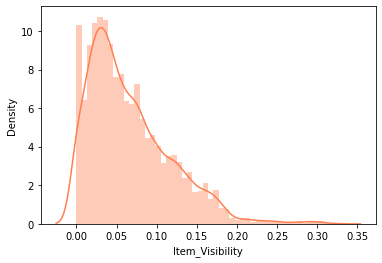

In [10]:
# Item_visibility
sns.distplot(train.Item_Visibility, color = "coral")

#some items have 0 visibility that needs to be fixing

d:\programming_advance\data_bot\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

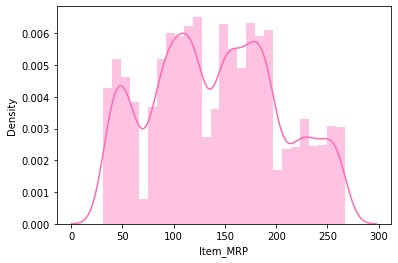

In [14]:
# Item MRP
sns.distplot(train.Item_MRP, color = "hotpink")


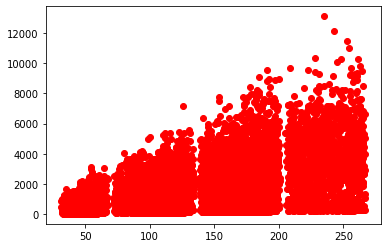

In [11]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = "red")

In [19]:
# Missing values treatnment

train.isna().sum()[train.isna().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [12]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
train.loc[train.Item_Weight.isna(),].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [16]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
train.loc[train.Item_Identifier =="NCZ30", "Item_Weight"]

1224    6.59
2428    6.59
3220    6.59
3739    6.59
4418    6.59
4523     NaN
7068    6.59
Name: Item_Weight, dtype: float64

In [18]:
train.loc[7, "Item_Weight"] = train.loc[train.Item_Identifier =="FDP10", "Item_Weight"].mean()

In [19]:
train.loc[7, "Item_Weight"]

19.0

In [20]:
train.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [21]:
location = train.loc[train.Item_Weight.isna(), ]. index

In [22]:
Item_id= train.loc[train.Item_Weight.isna(), "Item_Identifier"]

In [23]:
for i in location:
    train.loc[i, "Item_Weight"] = train.loc[train.Item_Identifier ==Item_id[i], "Item_Weight"].mean()

In [24]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
# ITEM VISIBILITY TREATNMENT

train["Item_Visibility"]= train.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace = 0,value=x.median()))

In [26]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
train.loc[train.Item_Weight.isna(), ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [28]:
train[927, "Item_Weight"]=train.loc[train.Item_Type=="Frozen Foods", "Item_Weight"].mean()

In [29]:
train[1922, "Item_Weight"]=train.loc[train.Item_Type=="Snake Foods", "Item_Weight"].mean()

In [30]:
train[4187, "Item_Weight"]=train.loc[train.Item_Type=="Dairy", "Item_Weight"].mean()

In [31]:
train[5022, "Item_Weight"]=train.loc[train.Item_Type=="Banking Goods", "Item_Weight"].mean()

In [32]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
(927, Item_Weight)              0
(1922, Item_Weight)          8523
(4187, Item_Weight)             0
(5022, Item_Weight)          8523
dtype: int64

In [33]:
pd.DataFrame(train.groupby("Outlet_Type")["Outlet_Size"].value_counts()).T

Outlet_Type Grocery Store Supermarket Type1             Supermarket Type2  \
Outlet_Size         Small             Small High Medium            Medium   
Outlet_Size           528              1860  932    930               928   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Size               935

In [35]:
train.loc[train.Outlet_Size.isna() & (train.Outlet_Type=="Grocery Store")]="Small"

In [34]:
train.loc[(train.Outlet_Size.isna()) & (train.Outlet_Type=="Grocery Store"), "Outlet_Size"]="Small"

In [37]:
train.loc[train.Outlet_Size.isna(),].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(927, Item_Weight)","(1922, Item_Weight)","(4187, Item_Weight)","(5022, Item_Weight)"
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,12.782404,NaN,13.379905,NaN
9,FDU28,19.2,Regular,0.09445,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.535,12.782404,NaN,13.379905,NaN


In [42]:
pd.DataFrame(train.groupby(["Outlet_Type","Outlet_Location_Type"])["Outlet_Size"].value_counts()).T

Outlet_Type          Grocery Store        Supermarket Type1               \
Outlet_Location_Type        Tier 1 Tier 3            Tier 1       Tier 2   
Outlet_Size                  Small  Small            Medium Small  Small   
Outlet_Size                    528    555               930   930    930   

Outlet_Type                 Supermarket Type2 Supermarket Type3  
Outlet_Location_Type Tier 3            Tier 3            Tier 3  
Outlet_Size            High            Medium            Medium  
Outlet_Size             932               928               935

In [43]:
train.loc[train.Outlet_Size.isna() & (train.Outlet_Type=="Supermarket Type1"), "Outlet_Size"]="Small"

In [45]:
## Direct Approch

train["Item_Cat"]= train.Item_Identifier.str[:2]

In [46]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [56]:
#Perishables & Non- Persishables

perish = ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 
       'Breakfast','Breads','Seafood']

In [57]:
def periperi(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non-Pershiables")

In [58]:
train["ItemType_Cat"]= train.Item_Type.apply(periperi)

In [59]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [60]:
# Where the Item Type  has NC, we will introduce 
## Non-edibloe oin item fat content    

In [62]:
train.loc[train.Item_Cat=="NC", "Item_Fat_Content"] = 'Non Edible'

In [63]:
train.Item_Fat_Content.value_counts()

Low Fat       3612
Regular       2889
Non Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

In [65]:
 train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [66]:
high= ["OUT013", "OUT027"]
low = ["OUT019", "OUT010"]

In [67]:
def out_cat (x):
    if x in high:
        return('High_performing')
    elif ( x in low):
        return("low_performing")
    else:
        return("Average")

In [69]:
train["Outlet_Cat"]=train.Outlet_Identifier.apply(out_cat)

In [70]:
train.Outlet_Cat.unique()

array(['Average', 'low_performing', 'High_performing'], dtype=object)

In [72]:
# Vintage of the Outlet = 2013-Est year....
train["Outlet_Vinatge"]= 2013- train.Outlet_Establishment_Year

In [73]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(927, Item_Weight)","(1922, Item_Weight)","(4187, Item_Weight)","(5022, Item_Weight)",Item_Cat,ItemType_Cat,Outlet_Cat,Outlet_Vinatge
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.782404,NaN,13.379905,NaN,DR,Perishables,Average,4
2,FDN15,17.5,Low Fat,0.01676,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
3,FDX07,19.2,Regular,0.022861,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.38,12.782404,NaN,13.379905,NaN,FD,Perishables,low_performing,15
4,NCD19,8.93,Non Edible,0.00659,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,High_performing,26


In [76]:
# drop features
new_train = train.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year"], axis=1)

In [77]:
new_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(927, Item_Weight)","(1922, Item_Weight)","(4187, Item_Weight)","(5022, Item_Weight)",Item_Cat,ItemType_Cat,Outlet_Cat,Outlet_Vinatge
0,9.3,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.138,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12.782404,NaN,13.379905,NaN,DR,Perishables,Average,4
2,17.5,Low Fat,0.01676,141.618,Medium,Tier 1,Supermarket Type1,2097.27,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
3,19.2,Regular,0.022861,182.095,Small,Tier 3,Grocery Store,732.38,12.782404,NaN,13.379905,NaN,FD,Perishables,low_performing,15
4,8.93,Non Edible,0.00659,53.8614,High,Tier 3,Supermarket Type1,994.7052,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,High_performing,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,High_performing,26
8519,8.38,Regular,0.046982,108.157,Small,Tier 2,Supermarket Type1,549.285,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,Average,11
8520,10.6,Non Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,Average,9
8521,7.21,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,Average,4


In [78]:
##Label Encoding

from msilib import sequence


*This is a form of encoding which is used on categorial variables that have a certain order. For e.g Shirt size(small, medium...),
height(in inches)
* we use Skleran.preprocessing label encoder the values.
* The way Sklearn works is that it will encode the data basis in alphabetical sequence

SyntaxError: invalid syntax (4034314282.py, line 6)

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
# new_train["Outlet_Size"] = le.fit_transform(new_train.Outlet_Size)
new_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(927, Item_Weight)","(1922, Item_Weight)","(4187, Item_Weight)","(5022, Item_Weight)",Item_Cat,ItemType_Cat,Outlet_Cat,Outlet_Vinatge
0,9.3,Low Fat,0.016047,249.8092,1,Tier 1,Supermarket Type1,3735.138,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
1,5.92,Regular,0.019278,48.2692,1,Tier 3,Supermarket Type2,443.4228,12.782404,NaN,13.379905,NaN,DR,Perishables,Average,4
2,17.5,Low Fat,0.01676,141.618,1,Tier 1,Supermarket Type1,2097.27,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
3,19.2,Regular,0.022861,182.095,2,Tier 3,Grocery Store,732.38,12.782404,NaN,13.379905,NaN,FD,Perishables,low_performing,15
4,8.93,Non Edible,0.00659,53.8614,0,Tier 3,Supermarket Type1,994.7052,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,High_performing,26


In [82]:
new_train["Outlet_Location_Type"] = le.fit_transform(new_train.Outlet_Location_Type)


In [83]:
new_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,"(927, Item_Weight)","(1922, Item_Weight)","(4187, Item_Weight)","(5022, Item_Weight)",Item_Cat,ItemType_Cat,Outlet_Cat,Outlet_Vinatge
0,9.3,Low Fat,0.016047,249.8092,1,0,Supermarket Type1,3735.138,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
1,5.92,Regular,0.019278,48.2692,1,2,Supermarket Type2,443.4228,12.782404,NaN,13.379905,NaN,DR,Perishables,Average,4
2,17.5,Low Fat,0.01676,141.618,1,0,Supermarket Type1,2097.27,12.782404,NaN,13.379905,NaN,FD,Perishables,Average,14
3,19.2,Regular,0.022861,182.095,2,2,Grocery Store,732.38,12.782404,NaN,13.379905,NaN,FD,Perishables,low_performing,15
4,8.93,Non Edible,0.00659,53.8614,0,2,Supermarket Type1,994.7052,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,High_performing,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,0,2,Supermarket Type1,2778.3834,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,High_performing,26
8519,8.38,Regular,0.046982,108.157,2,1,Supermarket Type1,549.285,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,Average,11
8520,10.6,Non Edible,0.035186,85.1224,2,1,Supermarket Type1,1193.1136,12.782404,NaN,13.379905,NaN,NC,Non-Pershiables,Average,9
8521,7.21,Regular,0.145221,103.1332,1,2,Supermarket Type2,1845.5976,12.782404,NaN,13.379905,NaN,FD,Non-Pershiables,Average,4


In [85]:
new_train.select_dtypes(include= np.number).columns

Index(['Outlet_Size', 'Outlet_Location_Type'], dtype='object')